# Parkinson Data

## Segmentation of the signals at - beginning, middel & end -

In [32]:
import numpy as np
import audiofile as af
import os as os
from pathlib import Path
import matplotlib.pyplot as plt
from PyEMD import EMD
import time
import seaborn as sn
from matplotlib import cm as CM
import pandas as pd
import pickle
import math

## HC patients


In [3]:
os.getcwd()
hc_folder = Path('C:\\Users\\Marta\\Desktop\\Parkinson_data\\26_29_09_2017_KCL\\ReadText\HC\\').rglob('*.wav')
files = [x for x in hc_folder]
hc = len(files)

In [5]:
files

[WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID00_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID01_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID03_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID05_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID08_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID09_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID10_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID11_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/HC/ID12_hc_0_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/Rea

In [6]:
all_sig_hc = []

for i in range(0,hc):
    all_sig_hc.append(af.read(files[i])) 


In [7]:
dur = []
n_samples = []
for i in range(0,hc):
    dur.append(af.duration(files[i]))    
    n_samples.append(af.samples(files[i])) 
    
print(dur)
print(n_samples)

[151.114716553288, 164.1050566893424, 139.55532879818594, 110.92691609977324, 146.10476190476192, 125.47598639455782, 136.77233560090704, 148.38630385487528, 130.53124716553287, 168.41766439909298, 170.63448979591837, 141.25108843537416, 122.20575963718821, 167.4401814058957, 203.59596371882085, 174.34809523809523, 153.74072562358276, 145.78263038548752, 192.97562358276645, 93.23818594104308, 158.59467120181407]
[6664159, 7237033, 6154390, 4891877, 6443220, 5533491, 6031660, 6543836, 5756428, 7427219, 7524981, 6229173, 5389274, 7384112, 8978582, 7688750, 6779966, 6429014, 8510225, 4111804, 6994025]


### Segment the data  to eliminate the parts where there is no speech



| HC Patient   | Gender | Mn. to break - start |  Sec. to break - start | Mn. to break - mid |  Sec. to break mid | Mn. to break - mid2 |  Sec. to break mid2 | Mn. to break - end |  Sec. to break end |  
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|  1  |  F   | - | 16 | -  | 57  | - | 59 | 02:28 | 148 |
| 2  |   F   | - | 26 | 02:37 | 157 | - | - | - | - |
| 3  |   M   | - | 25 | 01:28  | 88 | 01:30 | 90  | 02:18 | 138 |
| 4  |   F   | - | 20 | 01:12  | 72 | 01:19 | 79  | 01:49 | 109 |
| 5  |   F   | - | 25 | 02:26 | 146 | - | - | -  | -  |
| 6  |   F   | - | 25 | 01:02  | 62 | 01:11 | 71  | 02:05  | 125  |
| 7  |   F   | - | 29 | 01:08  | 68 | 01:14 | 74  | 02:16  | 136 |
| 8  |   F   | - | 29 | 01:38  | 98 | 01:46 | 106 | 02:28  | 148 |
| 9  |   F   | - | 27 | 01:26  | 86 | 01:31  | 91 | 02:10  | 130 |
| 10  |  F   | - | 32 | 02:01  | 121 | 02:09 | 129 | 02:48 | 168 |
| 11  |  M   | - | 25 | 01:45  | 105 | 01:55 | 115 | 02:50 | 170 |
| 12  |  F   | - | 25 | 01:04  | 64  | 01:10 | 70  | 02:20 | 141 |
| 13  |  F   | - | 28 | 01:02  | 62  | 01:08 | 68  | 02:02 | 122 |
| 14  |  F   | - | 27 | 01:11  | 71  | 01:17 | 77  | 02:47 | 167 |
| 15  |  F   | - | 23 | 01:23  | 83  | 01:28 | 88  | 03:23 | 203 |
| 16  |  F   | - | 24 | 01:20  | 80  | 01:24 | 84  | 02:54 | 174 |
| 17  |  F   | - | 24 | 01:04  | 64  | 01:08 | 68  | 02:33 | 153 |
| 18  |  F   | - | 26 | 01:08  | 68  | 01:13 | 73  | 02:26 | 145 |
| 19  |  F   | - | 23 | 01:20  | 80  | 01:41 | 101 | 03:12 | 192 |
| 20  |  F   | - | 31 | 01:33  | 93  | - | - | - | - |
| 21  |  F   | - | 37 | 01:45  | 95  | 01:52 | 112 | 02:38 | 158 |


In [8]:
hc_df = pd.DataFrame( np.array([[ 1, 'F' , 16 ,57 ,59 , 148], 
                                [ 2, 'F' ,26 , 157, 0, 0  ], 
                                [ 3 , 'M', 25,88,90, 138],
                                [ 4,  'F' ,20, 72, 79, 109 ], 
                                [5, 'F',25,146,0 ,0 ],
                                [6, 'F',25 ,62 ,71,125],
                                [7 , 'F' , 29, 68 ,74 , 136 ], 
                                [ 8, ' F ' , 29,98,106, 148 ],
                                [ 9 ,  'F' ,27 , 86 ,91 , 130 ],
                                [10, 'F',32 , 121, 129, 168 ],
                                [11, 'M' ,25 , 105 ,115 ,170 ], 
                                [12 , 'F',25 ,64, 70, 141],
                                [13 ,'F', 28, 62 , 68, 122],
                                [ 14,'F',27 ,71 ,77 ,167 ],
                                [15, 'F',23 , 83 , 88, 203],
                                [16 , 'F',24 ,80 , 84, 174  ],
                                [17 , 'F',24,64, 68,153],
                                [18, 'F',26 ,68, 73, 145],
                                [ 19,' F ',23 ,80,101 , 192 ],
                                [20 , ' F',31 , 93, 0, 0],
                                [21 ,'F',37 ,95,112, 158 ]]),
                    columns = ["HC Patient #", "Gender", "Sec_start", "Sec_break1", "Sec_start2", "Sec_break2"]  )

hc_df

,HC Patient #,Gender,Sec_start,Sec_break1,Sec_start2,Sec_break2
0,1,F,16,57,59,148
1,2,F,26,157,0,0
2,3,M,25,88,90,138
3,4,F,20,72,79,109
4,5,F,25,146,0,0
5,6,F,25,62,71,125
6,7,F,29,68,74,136
7,8,F,29,98,106,148
8,9,F,27,86,91,130
9,10,F,32,121,129,168


In [9]:
sec_off1_hc = np.array(hc_df.T.iloc[2]).astype(float)
sec_off1_hc

array([16., 26., 25., 20., 25., 25., 29., 29., 27., 32., 25., 25., 28.,
       27., 23., 24., 24., 26., 23., 31., 37.])

In [10]:
sec_dur1_hc = np.array(hc_df.T.iloc[3]).astype(float) - np.array(hc_df.T.iloc[2]).astype(float)
sec_dur1_hc


array([ 41., 131.,  63.,  52., 121.,  37.,  39.,  69.,  59.,  89.,  80.,
        39.,  34.,  44.,  60.,  56.,  40.,  42.,  57.,  62.,  58.])

In [11]:
sec_off2_hc = np.array(hc_df.T.iloc[4]).astype(float)
sec_off2_hc

array([ 59.,   0.,  90.,  79.,   0.,  71.,  74., 106.,  91., 129., 115.,
        70.,  68.,  77.,  88.,  84.,  68.,  73., 101.,   0., 112.])

In [12]:
sec_dur2_hc = np.array(hc_df.T.iloc[5]).astype(float) - np.array(hc_df.T.iloc[4]).astype(float)
sec_dur2_hc


array([ 89.,   0.,  48.,  30.,   0.,  54.,  62.,  42.,  39.,  39.,  55.,
        71.,  54.,  90., 115.,  90.,  85.,  72.,  91.,   0.,  46.])

In [13]:
first_seg_hc = [af.read(files[i], offset = sec_off1_hc[i], duration = sec_dur1_hc[i])  for i in range(0,hc)]
sec_seg_hc = [ np.array(0) if sec_off2_hc[i] == 0 else af.read(files[i], offset = sec_off2_hc[i],
                                                               duration = sec_dur2_hc[i])  
           for i in range(0,hc) ]

In [18]:
len_seg1 = [len(first_seg_hc[i][0]) for i in range(0,hc)]
len_seg1

[1808100,
 5777100,
 2778300,
 2293200,
 5336100,
 1631700,
 1719900,
 3042900,
 2601900,
 3924900,
 3528000,
 1719900,
 1499400,
 1940400,
 2646000,
 2469600,
 1764000,
 1852200,
 2513700,
 2734200,
 2557800]

In [15]:
len_seg2 = [0 if sec_seg_hc[i] == np.array(0) else  len(sec_seg_hc[i][0]) for i in range(0,hc)]

<ipython-input-15-f00531038bd7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  len_seg2 = [0 if sec_seg_hc[i] == np.array(0) else  len(sec_seg_hc[i][0]) for i in range(0,hc)]
<ipython-input-15-f00531038bd7>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  len_seg2 = [0 if sec_seg_hc[i] == np.array(0) else  len(sec_seg_hc[i][0]) for i in range(0,hc)]


In [19]:
len_seg2

[3924900,
 0,
 2116800,
 1323000,
 0,
 2381400,
 2734200,
 1852200,
 1719900,
 1719900,
 2425500,
 3131100,
 2381400,
 3969000,
 5071500,
 3969000,
 3748500,
 3175200,
 4013100,
 0,
 2028600]

In [21]:
len_seg1[0]

1808100

In [37]:
[len_seg1[i]/5000 for i in range(0,hc)]

[361.62,
 1155.42,
 555.66,
 458.64,
 1067.22,
 326.34,
 343.98,
 608.58,
 520.38,
 784.98,
 705.6,
 343.98,
 299.88,
 388.08,
 529.2,
 493.92,
 352.8,
 370.44,
 502.74,
 546.84,
 511.56]

In [25]:
final_seg_hc = [first_seg_hc[i][0] if sec_seg_hc[i] == 0 else np.concatenate((first_seg_hc[i][0], sec_seg_hc[i][0]),
                                                                             axis = None )  for i in range(0,hc)]

In [26]:
len(all_sig_hc[1][0]) - len(final_seg_hc[1]) 

1459933

In [61]:
#they have to be positive
check_len_new_sig_hc = [len(all_sig_hc[i][0]) - len(final_seg_hc[i]) for i in range(0,hc)]
check_len_new_sig_hc

[931159,
 1459933,
 1259290,
 1275677,
 1107120,
 1520391,
 1577560,
 1648736,
 1434628,
 1782419,
 1571481,
 1378173,
 1508474,
 1474712,
 1261082,
 1250151,
 1267466,
 1401614,
 1983425,
 1377604,
 2407625]

In [62]:
sum_segs_hc = [len(first_seg_hc[i][0])  if sec_seg_hc[i] == np.array(0) else 
               len(first_seg_hc[i][0]) + len(sec_seg_hc[i][0]) for i in range(0,hc)]

<ipython-input-62-5867a477fe9b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sum_segs_hc = [len(first_seg_hc[i][0])  if sec_seg_hc[i] == np.array(0) else
<ipython-input-62-5867a477fe9b>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  sum_segs_hc = [len(first_seg_hc[i][0])  if sec_seg_hc[i] == np.array(0) else


In [63]:
#They have to be true all 
second_check_new_sig_hc = [ sum_segs_hc[i] ==  len(final_seg_hc[i]) for i in range(0,hc)] 
second_check_new_sig_hc

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

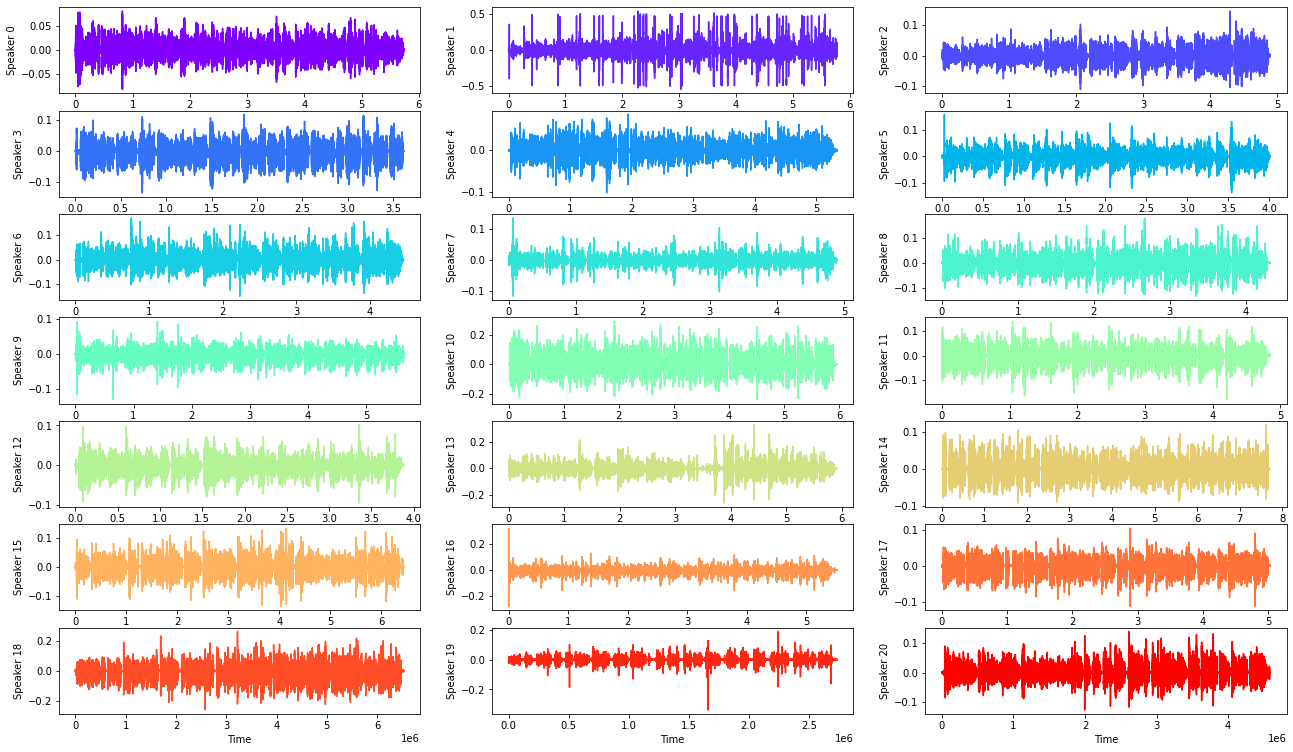

In [135]:
rain_col = CM.rainbow(np.linspace(0,1,hc))

fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize=(22,13))

for ax,i, c in zip(axes.flat,range(0,hc),rain_col):
    ax.plot(final_seg_hc[i], color = c)
    ax.set_ylabel(format("Speaker " + str(i)))
    ax.set(xlabel = 'Time')


In [20]:
#saving the file
pickle.dump(final_seg_hc, open("final_seg_hc.dat", "wb"))  #dat extension for python

with open('final_seg_hc.txt', 'w') as f:
    for item in final_seg_hc:
        f.write("%s\n" % item)

In [28]:
#to load the data
#final_seg_hc = pickle.load(open("final_seg_hc.text", "rb"))

In [137]:
np.save('final_seg_hc',final_seg_hc)


C:\Users\Marta\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [138]:
type(final_seg_hc)

list

## PD patients


In [64]:
os.getcwd()
pd_folder = Path('C:\\Users\\Marta\\Desktop\\Parkinson_data\\26_29_09_2017_KCL\\ReadText\\PD\\').rglob('*.wav')
files_pd = [x for x in pd_folder]
pdd= len(files_pd)
print(pdd)

16


In [65]:
files_pd

[WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID02_pd_2_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID04_pd_2_0_1.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID06_pd_3_1_1.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID07_pd_2_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID13_pd_3_2_2.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID16_pd_2_0_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID17_pd_2_1_0.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID18_pd_4_3_3.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/ReadText/PD/ID20_pd_3_0_1.wav'),
 WindowsPath('C:/Users/Marta/Desktop/Parkinson_data/26_29_09_2017_KCL/Rea

In [66]:
all_sig_pd = []

for i in range(0,pdd):
    all_sig_pd.append(af.read(files_pd[i])) 

In [67]:
dur_pd = []
n_samples_pd = []
for i in range(0,pdd):
    dur_pd.append(af.duration(files_pd[i]))    
    n_samples_pd.append(af.samples(files_pd[i])) 
    
print(dur_pd)
print(n_samples_pd)

[157.55666666666667, 122.48226757369615, 178.92011337868482, 147.66569160997733, 93.36138321995465, 167.2638321995465, 109.41208616780045, 85.74224489795918, 141.08097505668934, 141.93798185941043, 83.77777777777777, 155.27170068027212, 132.25421768707483, 73.03902494331066, 118.36952380952381, 127.92086167800454]
[6948249, 5401468, 7890377, 6512057, 4117237, 7376335, 4825073, 3781233, 6221671, 6259465, 3694599, 6847482, 5832411, 3221021, 5220096, 5641310]


### Segment the data  to eliminate the parts where there is no speech


| PD Patient   | Gender | Mn. to break - start |  Sec. to break - start | Mn. to break - mid |  Sec. to break mid | Mn. to break - mid2 |  Sec. to break mid2 | Mn. to break - end |  Sec. to break end |  
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  |  M   | - | 3  | 01:42  | 102  | 01:48 | 108 | 02:31 | 151 |
| 2  |  M   | - | 38 | 01:26  | 86   | 01:32 | 92  | 02:01 | 121 |
| 3  |  M   | - | 30 | 01:15  | 75   | 01:25 | 85  | 02:58 | 178 |
| 4  |  M   | - | 22 | 01:07  | 67   | 01:14 | 74  | 02:25 | 145 |
| 5  |  M   | - | 34 | 01:32  | 92   |  - |  -  |  -  |  -  |
| 6  |  F   | - | 29 | 01:18  | 78   | 01:33 | 93  | 02:45 | 165 |
| 7  |  F   | - | 43 | 01:47  | 107  |  -  | - | - | - |
| 8  |  M   | - | 6  | 01:22  | 82   |  -  | - | - | - |
| 9  |  M   | - | 23 | 01:06  | 66   | 01:11 | 71  | 02:19 | 139 |
| 10 |  M   | - | 26 | 01:02  | 62   | 01:06 | 66  | 02:19 | 139 |
| 11 |  M   | - | 24 | 01:23  | 83   |  -  | - | - | - |
| 12 |  M   | - | 24 |   -    | 59   | 01:21 | 81  | 02:31 | 151 |
| 13 |  F   | - | 12 |   -    | 56   | 01:07 | 67  | 02:11 | 131 |
| 14 |  M   | - | 12 | 01:05  | 65   |  -  | - | - | - |
| 15 |  M   | - | 25 | 01:57  | 117  |  -  | - | - | - |
| 16 |  F   | - | 23 |    -   | 59   | 01:04 | 64  | 02:06 | 126 |





In [68]:
pd_df = pd.DataFrame( np.array([[ 1, ' M ', 3 , 102, 108 , 151], 
                                [ 2, 'M ', 38 , 86, 92, 121], 
                                [ 3 , 'M', 30 ,75 , 85, 178 ],
                                [ 4, 'M ',22, 67, 74, 145 ], 
                                [5,  'M', 34, 92, 0, 0],
                                [6,  'F ' , 29 , 78, 93, 165],
                                [7 ,  ' F',43 , 107, 0 , 0], 
                                [ 8, ' M ' , 6, 82, 0, 0 ],
                                [ 9 ,' M ',23 , 66 , 71 , 139],
                                [10,  'M' ,26 , 62 , 66 , 139 ],
                                [11, ' M ' , 24 ,83 ,0,0 ], 
                                [12 ,  'M', 24, 59, 81, 151],
                                [13 ,' F' , 12, 56 , 67,  131],
                                [ 14, 'M' , 12 ,65 ,0,0 ],
                                [15, 'M',25 , 117 ,0 ,0],
                                [16 , ' F ' , 23 , 59 ,64 , 126 ]]),
                    columns = ["PD Patient #", "Gender", "Sec_start", "Sec_break1", "Sec_start2", "Sec_break2"]  )

pd_df

,PD Patient #,Gender,Sec_start,Sec_break1,Sec_start2,Sec_break2
0,1,M,3,102,108,151
1,2,M,38,86,92,121
2,3,M,30,75,85,178
3,4,M,22,67,74,145
4,5,M,34,92,0,0
5,6,F,29,78,93,165
6,7,F,43,107,0,0
7,8,M,6,82,0,0
8,9,M,23,66,71,139
9,10,M,26,62,66,139


In [69]:
sec_off1_pd = np.array(pd_df.T.iloc[2]).astype(float)
sec_off1_pd

array([ 3., 38., 30., 22., 34., 29., 43.,  6., 23., 26., 24., 24., 12.,
       12., 25., 23.])

In [70]:
sec_dur1_pd = np.array(pd_df.T.iloc[3]).astype(float) - np.array(pd_df.T.iloc[2]).astype(float)
sec_dur1_pd

array([99., 48., 45., 45., 58., 49., 64., 76., 43., 36., 59., 35., 44.,
       53., 92., 36.])

In [71]:
sec_off2_pd = np.array(pd_df.T.iloc[4]).astype(float)
sec_off2_pd

array([108.,  92.,  85.,  74.,   0.,  93.,   0.,   0.,  71.,  66.,   0.,
        81.,  67.,   0.,   0.,  64.])

In [72]:
sec_dur2_pd = np.array(pd_df.T.iloc[5]).astype(float) - np.array(pd_df.T.iloc[4]).astype(float)
sec_dur2_pd

array([43., 29., 93., 71.,  0., 72.,  0.,  0., 68., 73.,  0., 70., 64.,
        0.,  0., 62.])

In [73]:
first_seg_pd = [af.read(files_pd[i], offset = sec_off1_pd[i], duration = sec_dur1_pd[i])  for i in range(0,pdd)]
sec_seg_pd = [ np.array(0) if sec_off2_pd[i] == 0 else af.read(files_pd[i], offset = sec_off2_pd[i],
                                                               duration = sec_dur2_pd[i])  
           for i in range(0,pdd) ]

In [76]:
len_seg1_pd = [len(first_seg_pd[i][0]) for i in range(0,pdd)]
len_seg1_pd

[4365900,
 2116800,
 1984500,
 1984500,
 2557800,
 2160900,
 2822400,
 3351600,
 1896300,
 1587600,
 2601900,
 1543500,
 1940400,
 2337300,
 4057200,
 1587600]

In [75]:
len_seg2_pd = [0 if sec_seg_pd[i] == np.array(0) else  len(sec_seg_pd[i][0]) for i in range(0,pdd)]
len_seg2_pd

<ipython-input-75-c28ba9af3dd4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  len_seg2_pd = [0 if sec_seg_pd[i] == np.array(0) else  len(sec_seg_pd[i][0]) for i in range(0,pdd)]
<ipython-input-75-c28ba9af3dd4>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  len_seg2_pd = [0 if sec_seg_pd[i] == np.array(0) else  len(sec_seg_pd[i][0]) for i in range(0,pdd)]


[1896300,
 1278900,
 4101300,
 3131100,
 0,
 3175200,
 0,
 0,
 2998800,
 3219300,
 0,
 3087000,
 2822400,
 0,
 0,
 2734200]

In [77]:
final_seg_pd = [first_seg_pd[i][0] if sec_seg_pd[i] == 0 else np.concatenate((first_seg_pd[i][0], sec_seg_pd[i][0]), 
                                                                             axis = None ) 
                for i in range(0,pdd)]

In [78]:
#they have to be positive
check_len_new_sig_pd = [len(all_sig_pd[i][0]) - len(final_seg_pd[i]) for i in range(0,pdd)]
check_len_new_sig_pd

[686049,
 2005768,
 1804577,
 1396457,
 1559437,
 2040235,
 2002673,
 429633,
 1326571,
 1452565,
 1092700,
 2216982,
 1069611,
 883721,
 1162896,
 1319510]

In [80]:
sum_segs_pd = [len(first_seg_pd[i][0])  if sec_seg_pd[i] == np.array(0) else 
               len(first_seg_pd[i][0]) + len(sec_seg_pd[i][0]) for i in range(0,pdd)]

<ipython-input-80-a9e6b0b1854e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sum_segs_pd = [len(first_seg_pd[i][0])  if sec_seg_pd[i] == np.array(0) else
<ipython-input-80-a9e6b0b1854e>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  sum_segs_pd = [len(first_seg_pd[i][0])  if sec_seg_pd[i] == np.array(0) else


In [81]:
#They have to be true all 
second_check_new_sig_pd = [ sum_segs_pd[i] ==  len(final_seg_pd[i]) for i in range(0,pdd)] 
second_check_new_sig_pd

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

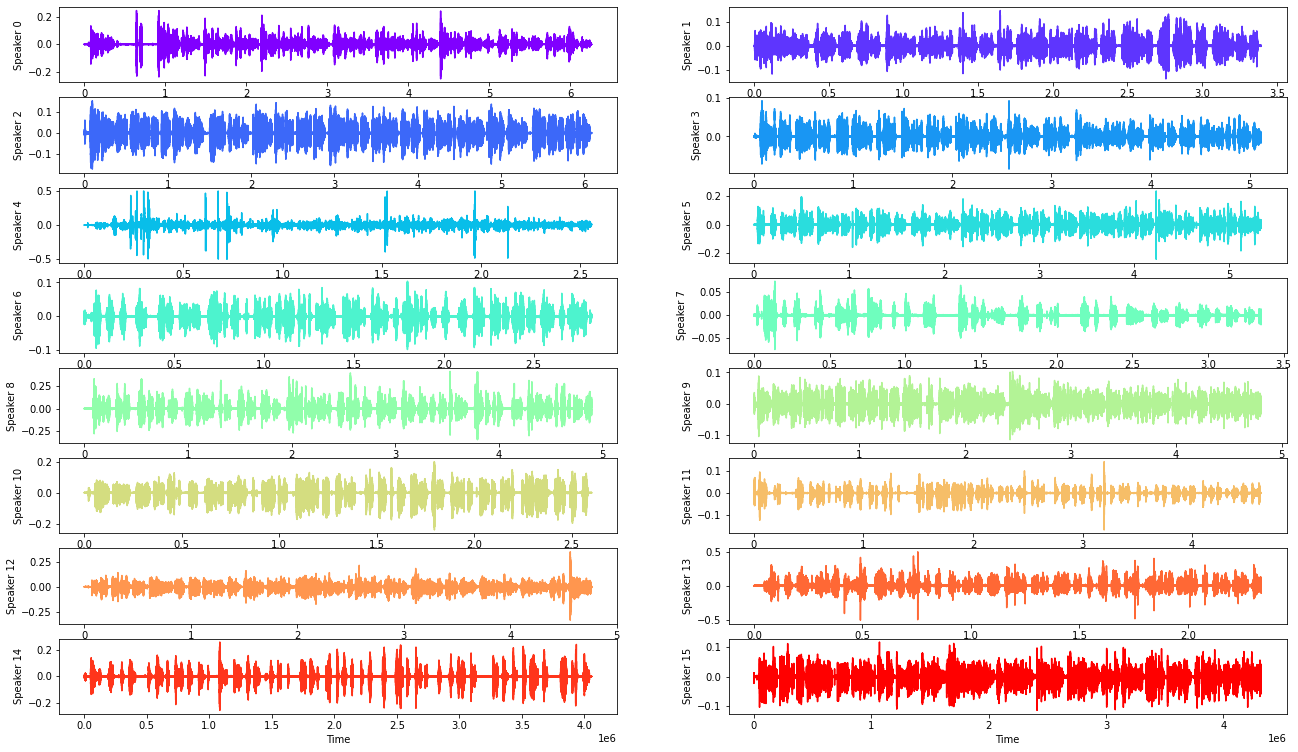

In [158]:
rain_col = CM.rainbow(np.linspace(0,1,pdd))

fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize=(22,13))

for ax,i, c in zip(axes.flat,range(0,pdd),rain_col):
    ax.plot(final_seg_pd[i], color = c)
    ax.set_ylabel(format("Speaker " + str(i)))
    ax.set(xlabel = 'Time')


In [159]:
#saving the file
pickle.dump(final_seg_pd, open("final_seg_pd.dat", "wb"))  #dat extension for python

with open('final_seg_pd.txt', 'w') as f:
    for item in final_seg_pd:
        f.write("%s\n" % item)

In [ ]:
#to load the data
#final_seg_pd = pickle.load(open("final_seg_pd.text", "rb"))

In [160]:
np.save('final_seg_pd',final_seg_pd)


C:\Users\Marta\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [161]:
type(final_seg_pd)

list

## Segments to remove in batches

Note that I concatenate the segments with no silence. Therefore, when split into batches, the ones where the concatenation takes place cannot be considered as sample batches. Hence, I compute the index for the last batch of the first segment and the one for the first batch of the second segment and remove them from the final batches. Note that I do this on R. I apply the same procedure on the IMFs.  

In [83]:
to_remove_hc = [np.array( [math.floor(len_seg1[i]/5000),  math.floor(len_seg1[i]/5000) +1] ) for i in range(0,hc)]
to_remove_hc

[array([361, 362]),
 array([1155, 1156]),
 array([555, 556]),
 array([458, 459]),
 array([1067, 1068]),
 array([326, 327]),
 array([343, 344]),
 array([608, 609]),
 array([520, 521]),
 array([784, 785]),
 array([705, 706]),
 array([343, 344]),
 array([299, 300]),
 array([388, 389]),
 array([529, 530]),
 array([493, 494]),
 array([352, 353]),
 array([370, 371]),
 array([502, 503]),
 array([546, 547]),
 array([511, 512])]

In [88]:
to_remove_pd = [np.array( [math.floor(len_seg1_pd[i]/5000),  math.floor(len_seg1_pd[i]/5000) +1] ) for i in range(0,pdd)]
to_remove_pd

[array([873, 874]),
 array([423, 424]),
 array([396, 397]),
 array([396, 397]),
 array([511, 512]),
 array([432, 433]),
 array([564, 565]),
 array([670, 671]),
 array([379, 380]),
 array([317, 318]),
 array([520, 521]),
 array([308, 309]),
 array([388, 389]),
 array([467, 468]),
 array([811, 812]),
 array([317, 318])]

In [89]:
np.save('to_remove_hc',to_remove_hc)
np.save('to_remove_pd',to_remove_pd)
